In [1]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


My predicition is that the logistical model would be more accurate considering that we are basing our calculations off of where thet loan status is viable or not. Meaning that the loan status variabloe is a binary between yes and no or, more persicely, zero and one. 

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
# Import the data
lend = pd.read_csv('Resources/lending_data.csv') #, header=None, names=['variance','skewness','curtosis', 'entropy', 'class'])
lend.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [4]:
# Split the data into X_train, X_test, y_train, y_test
# X = lend[['loan_size','interest_rate','borrower_income', 'debt_to_income', 'total_debt', 'num_of_accounts', 'derogatory_marks' ]]
X = lend.drop(columns = ['loan_status'])
y = lend['loan_status']

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

(77536, 7) (77536,)


In [5]:
# Train a Logistic Regression model print the model score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [6]:
# Train a Random Forest Classifier model and print the model score
# from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=1, n_estimators=500, min_samples_split=4).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9966983078827899
Testing Score: 0.9923648369789517


In [7]:
feature_importances = clf.feature_importances_

In [8]:
feature_importances


array([1.31072220e-01, 2.61178757e-01, 1.77925296e-01, 1.61296343e-01,
       1.21300648e-01, 9.44073287e-05, 1.47132328e-01])

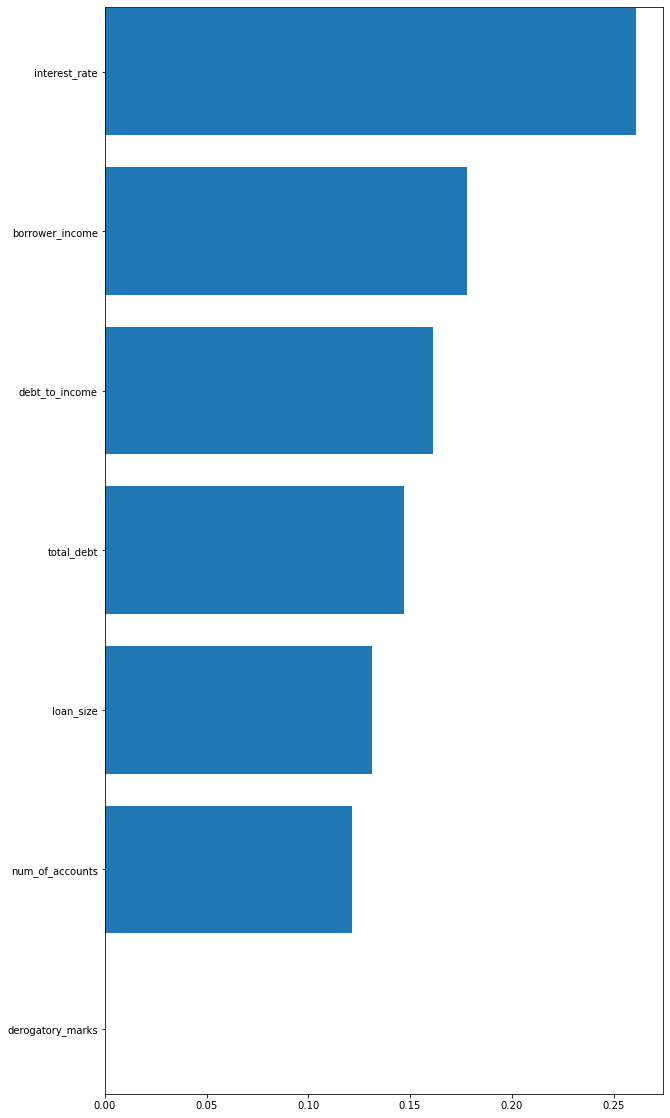

In [9]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

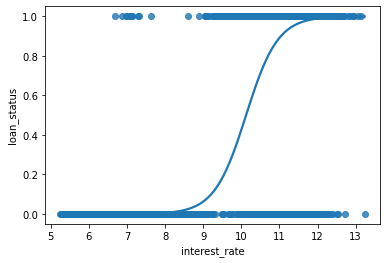

In [10]:
sns.regplot(x=lend['interest_rate'], y=y, data=lend, logistic=True, ci=None)